In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [22]:
df = pd.read_csv('Data\AQI_DELHI.csv')

In [24]:
df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Temp,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI
0,01-01-2024 00:00,173.91,259.59,4.95,3.30,8.20,50.63,4.05,1.37,7.36,...,NaN,75.02,0.83,144.81,38.23,987.63,10.73,0.0,0.0,350.0
1,02-01-2024 00:00,181.09,275.94,10.18,3.17,13.34,56.43,3.70,1.59,8.87,...,NaN,72.50,0.68,123.80,52.67,986.92,10.36,0.0,0.0,353.0
2,03-01-2024 00:00,186.42,264.86,22.72,26.90,34.79,56.94,1.90,2.03,8.03,...,NaN,84.26,0.85,101.49,32.82,986.81,9.72,0.0,0.0,337.0
3,04-01-2024 00:00,226.35,330.76,16.92,50.46,40.69,53.73,4.22,1.41,3.24,...,NaN,82.69,0.76,230.73,17.40,987.06,10.16,0.0,0.0,378.0
4,05-01-2024 00:00,174.19,289.28,14.02,46.62,36.20,56.67,4.57,1.65,2.99,...,NaN,85.81,0.87,163.80,12.15,987.05,10.76,0.0,0.0,358.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  502 non-null    object 
 1   PM2.5      499 non-null    float64
 2   PM10       499 non-null    float64
 3   NO         499 non-null    float64
 4   NO2        499 non-null    float64
 5   NOx        499 non-null    float64
 6   NH3        497 non-null    float64
 7   SO2        499 non-null    float64
 8   CO         498 non-null    float64
 9   Ozone      498 non-null    float64
 10  Benzene    497 non-null    float64
 11  Toluene    497 non-null    float64
 12  Temp       0 non-null      float64
 13  RH         498 non-null    float64
 14  WS         498 non-null    float64
 15  WD         498 non-null    float64
 16  SR         498 non-null    float64
 17  BP         498 non-null    float64
 18  AT         498 non-null    float64
 19  RF         498 non-null    float64
 20  TOT-RF    

In [27]:
pollutants = ['CO', 'NO', 'NO2', 'Ozone', 'SO2', 'PM2.5', 'PM10', 'NH3','AQI']
data = df[pollutants]

In [28]:
corr_coef=data.corr(method='pearson')

In [29]:
corr_coef=data.corr(method='pearson')

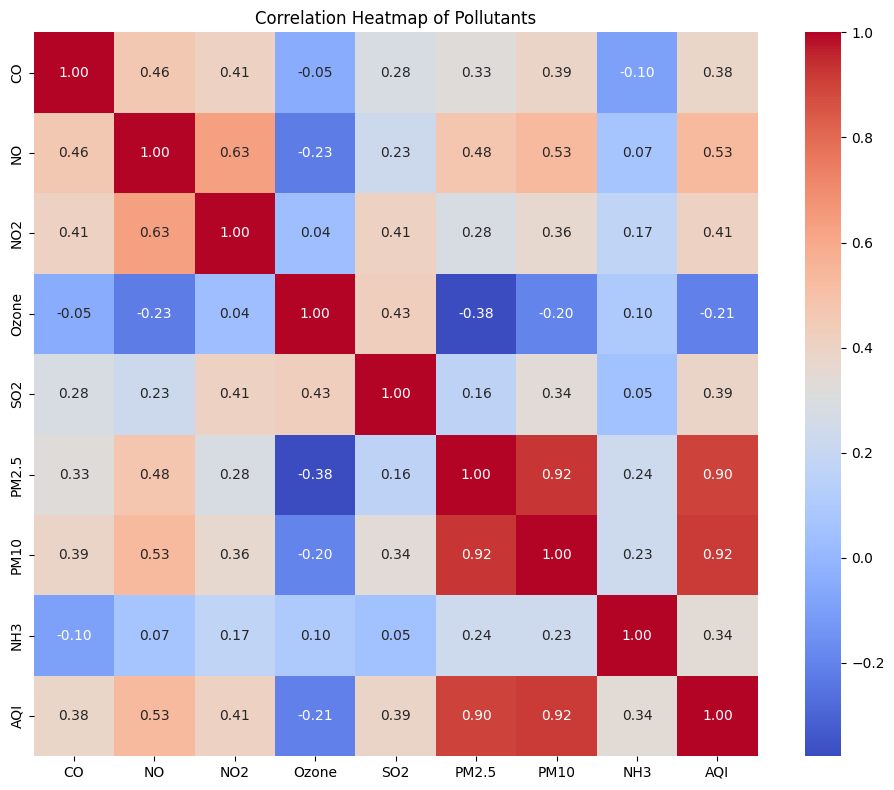

In [30]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_coef, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title("Correlation Heatmap of Pollutants")
plt.tight_layout()
plt.show()


✅ Correlation of gases with AQI:
 PM10       0.846442
PM2.5      0.820900
Benzene    0.499292
NOx        0.458861
Toluene    0.458834
NO         0.449952
NO2        0.370169
CO         0.348024
SO2        0.345669
NH3        0.216261
Ozone     -0.171202
Name: AQI, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_20636\966742963.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aqi_corr.values, y=aqi_corr.index, palette='coolwarm')


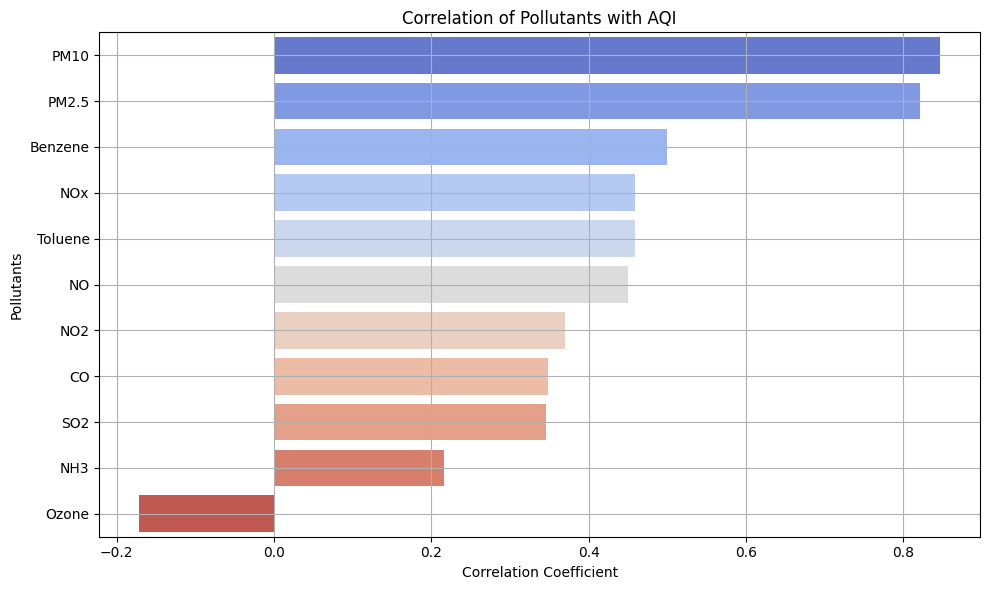

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Data\AQI_DELHI.csv")

# Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Define relevant gas columns including AQI
gas_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
               'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'AQI']

# Filter to only existing columns in the DataFrame
existing_columns = [col for col in gas_columns if col in df.columns]

# Warn if some columns are missing
missing_columns = list(set(gas_columns) - set(existing_columns))
if missing_columns:
    print("⚠️ Warning: The following columns are missing and will be skipped:", missing_columns)

# Convert to numeric and fill NaNs with column means
df_numeric = df[existing_columns].apply(pd.to_numeric, errors='coerce')
df_filled = df_numeric.fillna(df_numeric.mean())

# Calculate correlation of each gas with AQI
if 'AQI' in df_filled.columns:
    aqi_corr = df_filled.corr()['AQI'].drop('AQI').sort_values(ascending=False)
    print("\n✅ Correlation of gases with AQI:\n", aqi_corr)

    # Plot correlation
    plt.figure(figsize=(10, 6))
    sns.barplot(x=aqi_corr.values, y=aqi_corr.index, palette='coolwarm')
    plt.title("Correlation of Pollutants with AQI")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Pollutants")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("❌ 'AQI' column is missing — cannot compute correlations.")


In [31]:
import numpy as np

# Step 1: Compute correlation of AQI with all other features
aqi_correlations = data.corr()['AQI'].drop('AQI')

# Step 2: Set threshold
threshold = 0.80

# Step 3: Identify features with strong correlation (positive or negative)
to_discard = aqi_correlations[aqi_correlations.abs() > threshold].index.tolist()

# Step 4: Select features with acceptable correlation
selected_features = [col for col in data.columns if col not in to_discard and col != 'AQI']

# Output results
print("Features with correlation > 0.80 with AQI (to discard):", to_discard)
print("Selected features with acceptable correlation:", selected_features)

Features with correlation > 0.80 with AQI (to discard): ['PM2.5', 'PM10']
Selected features with acceptable correlation: ['CO', 'NO', 'NO2', 'Ozone', 'SO2', 'NH3']
